In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

from PIL import Image
import scipy as sp
import pylab
import h5py

(64, 64)


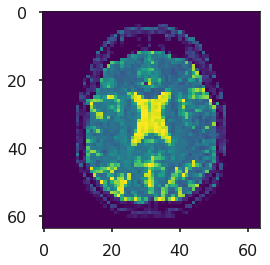

In [2]:
cortex  = Image.open('cortex.bmp')
cortex = np.asarray(cortex)[:,:,0]
# Downsampling
cortex = np.asarray(cortex)[::7,::7]
print(cortex.shape)
plt.imshow(cortex)

In [3]:
import scipy.io
mat_90 = scipy.io.loadmat('thinL64_90')
print(mat_90['H'].todense())
print(mat_90['H'].todense().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8100, 4096)


In [4]:
A_90 = mat_90['H'].todense()
print(A_90.shape)

(8100, 4096)


(4096,)
(8100, 1)


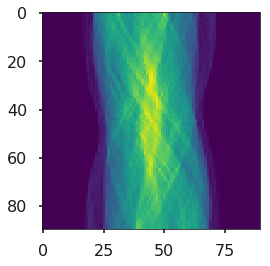

In [5]:
print(cortex.flatten().shape)
p_90 = np.transpose(np.matmul(A_90, cortex.flatten()))
print(p_90.shape)
plt.imshow(p_90.reshape(90, 90))

In [6]:
mat_128 = scipy.io.loadmat('thinL64_128')
print(mat_128['H'].todense().shape)
print(mat_128['H'].todense())

(8100, 4096)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
A_128 = mat_128['H'].todense()
print(A_128.shape)
print(np.array_equal(A_90, A_128))

(8100, 4096)
True


(4096,)
(8100, 1)


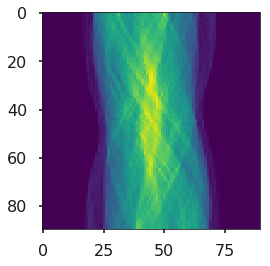

In [8]:
print(cortex.flatten().shape)
p_128 = np.transpose(np.matmul(A_128, cortex.flatten()))
print(p_128.shape)
plt.imshow(p_128.reshape(90, 90))

In [9]:
print(p_128[200])
print(p_90[200])

[[408.72188327]]
[[408.72188327]]


In [10]:
import h5py

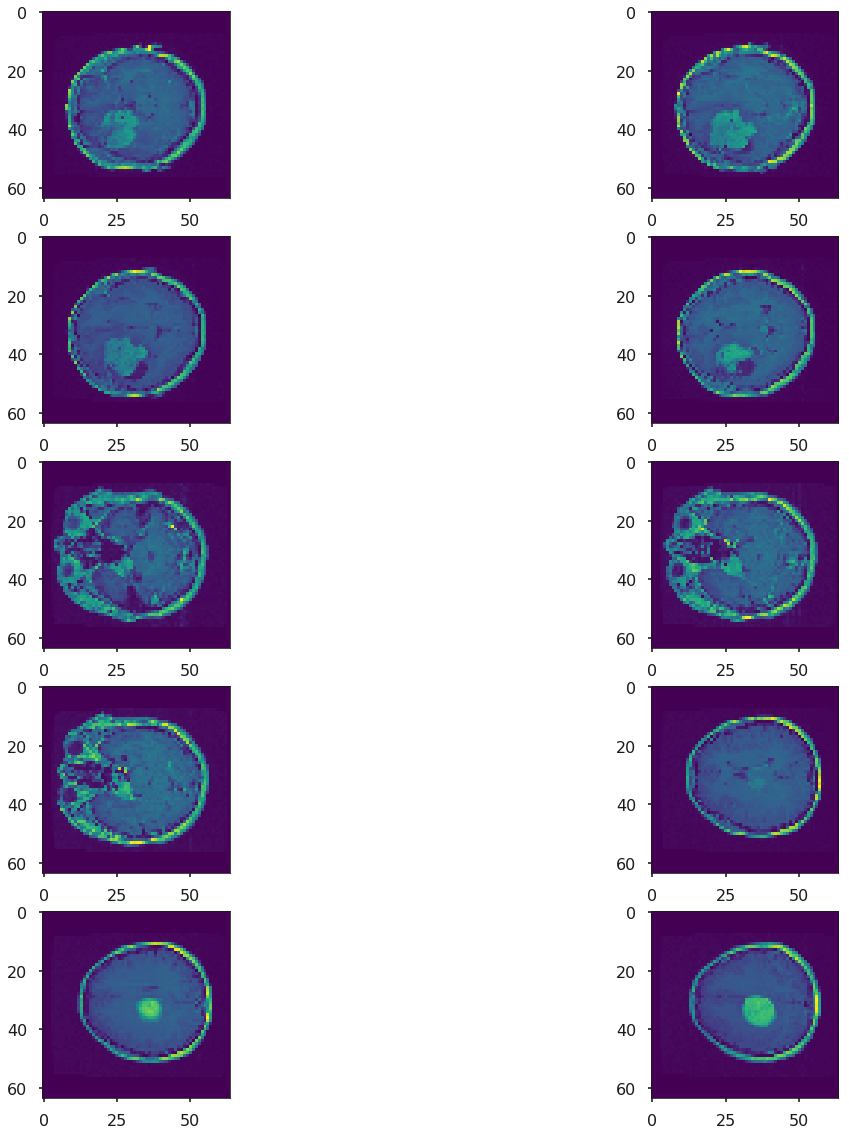

In [11]:
brains = []
for i in range(1, 201):
    with h5py.File('../Brain/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        
        brains += [brain]

columns = 2
rows = 5

fig=plt.figure(figsize=(20, 20))
for i in range(1, columns*rows +1):
    brain = brains[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(brain)
plt.show()

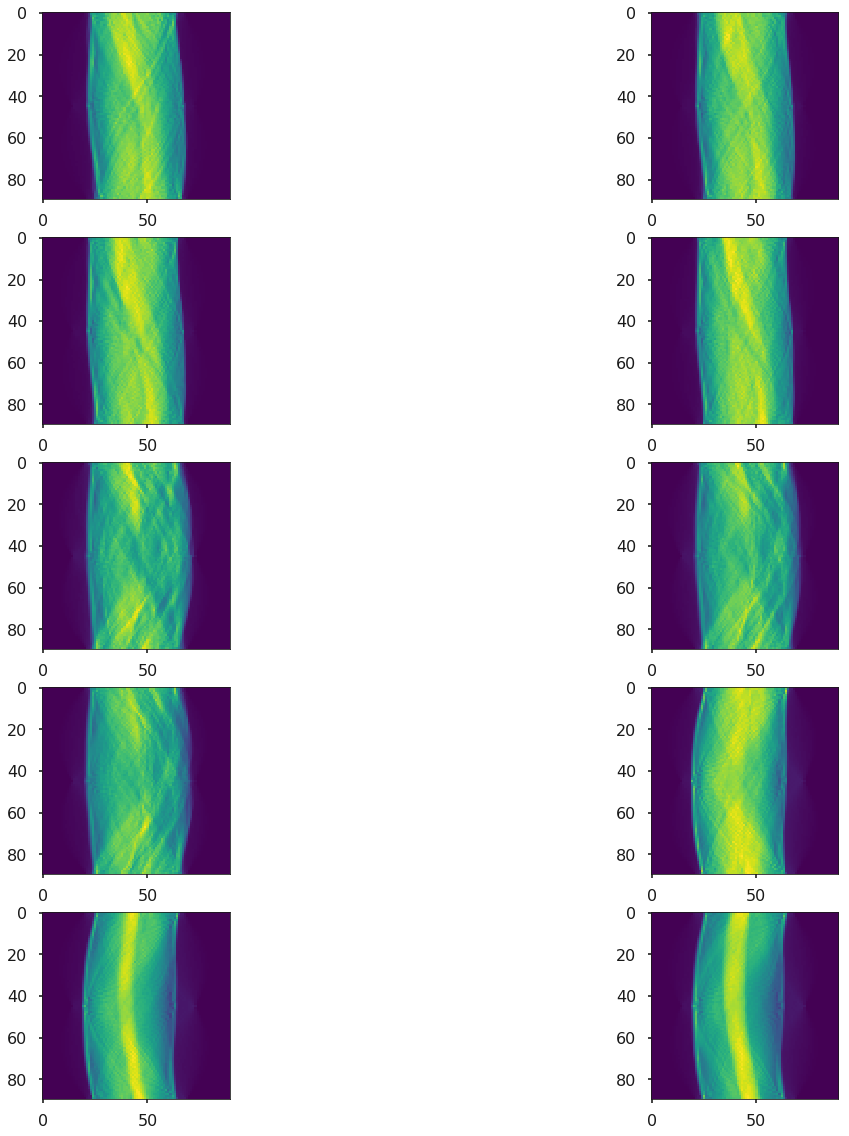

In [12]:
columns = 2
rows = 5
projections = []
fig=plt.figure(figsize=(20, 20))
for i in range(0, 200):
    brain = brains[i]
    p_90 = np.transpose(np.matmul(A_90, brain.flatten()))
    projections += [p_90]
    

for i in range(1, rows*columns + 1):
    p_90 = projections[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(p_90.reshape(90, 90))
    
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout

Using TensorFlow backend.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


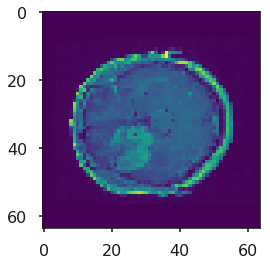

In [15]:
brains = np.array(brains).reshape(200, 64, 64, 1)
projections = np.array(projections).reshape(200, 90, 90, 1)

print(brains[1][:][:][:].reshape(64, 64))
plt.imshow(brains[1][:][:][:].reshape(64, 64))

In [16]:
model_ae = Sequential()

#WHY such a difference with a Sigmoid as the output activation 

model_ae.add(Conv2D(128, (5, 5), activation='relu', input_shape=(64, 64, 1)))
# model_ae.add(MaxPooling2D(pool_size=(2, 2)))
model_ae.add(Conv2D(64, (5, 5), activation='relu'))
model_ae.add(UpSampling2D())
model_ae.add(Conv2D(64, (5, 5), activation='relu'))
# model_ae.add(MaxPooling2D(pool_size=(2, 2)))
model_ae.add(Conv2D(32, (5, 5), activation='relu'))
model_ae.add(Conv2D(8, (5, 5), activation='relu'))
model_ae.add(Conv2D(1, (11, 11), activation='relu'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)
rms = RMSprop()

model_ae.compile(loss='MSE', optimizer=adam)
model_ae.fit(brains, projections, epochs=200, batch_size=5)

Epoch 1/200
200/200 [==============================] - 68s 338ms/step - loss: 523827240.0000
Epoch 2/200
200/200 [==============================] - 69s 344ms/step - loss: 295007384.0000
Epoch 3/200
200/200 [==============================] - 69s 347ms/step - loss: 222812394.4000
Epoch 4/200
200/200 [==============================] - 69s 343ms/step - loss: 184477832.4000
Epoch 5/200
200/200 [==============================] - 69s 344ms/step - loss: 163574174.8000
Epoch 6/200
200/200 [==============================] - 68s 342ms/step - loss: 145864315.4000
Epoch 7/200
200/200 [==============================] - 69s 345ms/step - loss: 138478718.8000
Epoch 8/200
200/200 [==============================] - 69s 345ms/step - loss: 150350555.6000
Epoch 9/200
200/200 [==============================] - 69s 344ms/step - loss: 128240793.8000
Epoch 10/200
200/200 [==============================] - 69s 343ms/step - loss: 126689176.3000
Epoch 11/200
200/200 [==============================] - 69s 344ms/ste

Epoch 89/200
200/200 [==============================] - 67s 333ms/step - loss: 40093783.8000
Epoch 90/200
200/200 [==============================] - 67s 335ms/step - loss: 43083091.4500
Epoch 91/200
200/200 [==============================] - 67s 335ms/step - loss: 41557600.3000
Epoch 92/200
200/200 [==============================] - 67s 334ms/step - loss: 37322812.7500
Epoch 93/200
200/200 [==============================] - 67s 334ms/step - loss: 38035652.7000
Epoch 94/200
200/200 [==============================] - 67s 333ms/step - loss: 37320390.1500
Epoch 95/200
200/200 [==============================] - 67s 334ms/step - loss: 39661486.2000
Epoch 96/200
200/200 [==============================] - 68s 338ms/step - loss: 39780387.0000
Epoch 97/200
200/200 [==============================] - 67s 336ms/step - loss: 36561260.7500
Epoch 98/200
200/200 [==============================] - 67s 335ms/step - loss: 35824446.7000
Epoch 99/200
200/200 [==============================] - 67s 335ms/step

200/200 [==============================] - 67s 334ms/step - loss: 16472177.4000
Epoch 177/200
200/200 [==============================] - 67s 335ms/step - loss: 16981965.6500
Epoch 178/200
200/200 [==============================] - 66s 331ms/step - loss: 17280853.4500
Epoch 179/200
200/200 [==============================] - 67s 333ms/step - loss: 15917388.7750
Epoch 180/200
200/200 [==============================] - 66s 332ms/step - loss: 15810024.7750
Epoch 181/200
200/200 [==============================] - 66s 331ms/step - loss: 15873017.8750
Epoch 182/200
200/200 [==============================] - 67s 335ms/step - loss: 14880073.0250
Epoch 183/200
200/200 [==============================] - 70s 351ms/step - loss: 16254782.3000
Epoch 184/200
200/200 [==============================] - 70s 351ms/step - loss: 16045597.3000
Epoch 185/200
200/200 [==============================] - 67s 336ms/step - loss: 19912666.8250
Epoch 186/200
200/200 [==============================] - 67s 333ms/step - 

In [17]:
print(np.array(brains).shape)

(200, 64, 64, 1)


In [18]:
prediction_array = model_ae.predict(brains[0].reshape(1, 64, 64, 1))

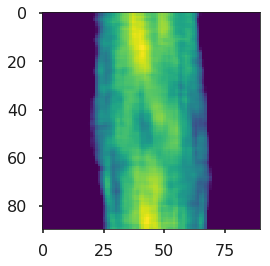

In [19]:
pred = prediction_array.reshape(90, 90)
plt.imshow(pred)

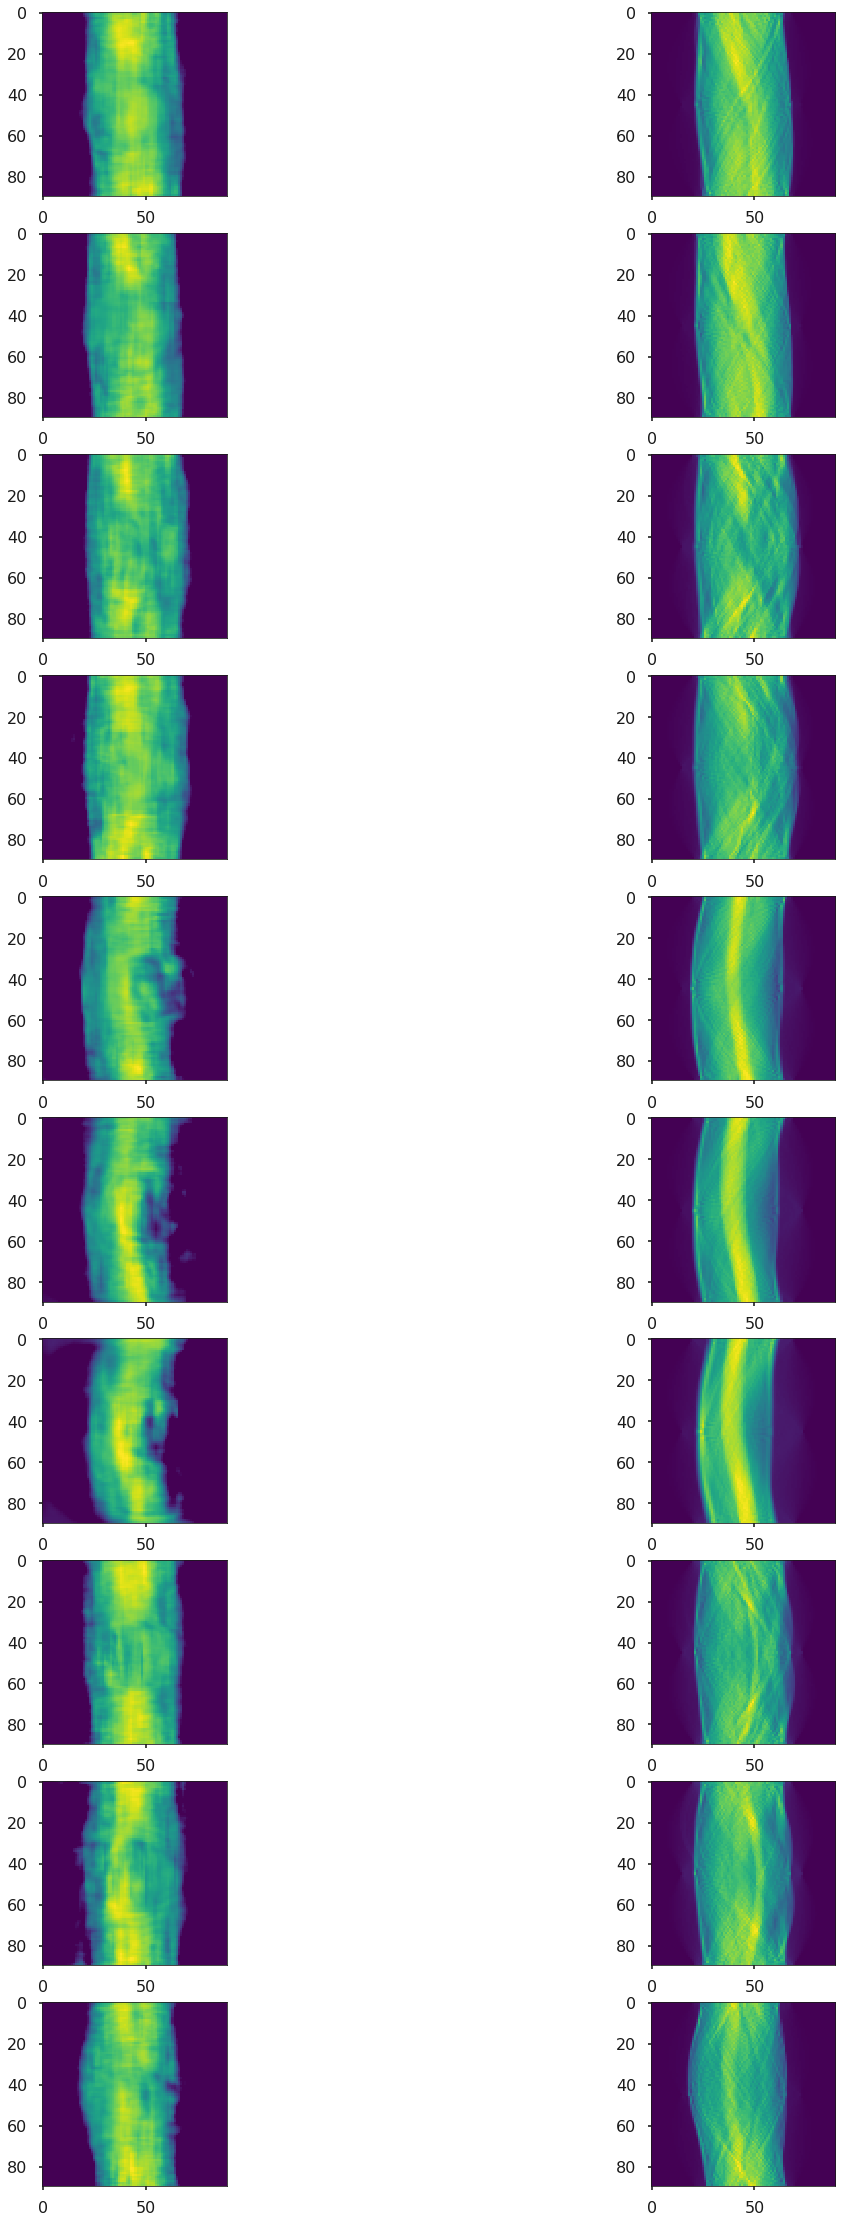

In [20]:
fig=plt.figure(figsize=(20, 40))

rows = 10
columns = 2

for i in range(1, columns*rows + 1, 2):
    pred = model_ae.predict(brains[i].reshape(1, 64, 64, 1)).reshape(90, 90)
    real = projections[i].reshape(90, 90)
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(pred)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(real)
    